# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

Using TensorFlow backend.


In [2]:
def a(dfr, H = 24):
    dft = dfr.copy()
    for i  in range(0,dft.shape[0],H):
        for j in range(dft.shape[1]):
            
            dft.iloc[i:(i+H),j] = dft.iloc[i:(i+H),j].mean()
    dft = dft[::H]
    return dft

def create_dataset(n_X, look_back=1):
    dataX, dataY = [], []
    for i in range(len(n_X)-look_back):
        a = n_X[i:(i+look_back), ]
        dataX.append(a)

        dataY.append(n_X[i + look_back, ])
    return np.array(dataX), np.array(dataY)


# Importing Dataset

In [3]:
df = pd.read_csv("../datasets/weatherHistory.csv")[['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Daily Summary']]
df.iloc[:,2] = df.iloc[:,2].fillna('None')
df.round(2)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Preprocessing

In [4]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
n=1
for n in [1,2,-1]:
 
    df.iloc[:,n] = labelencoder.fit_transform(df.iloc[:,n])


In [5]:
H=24

D = 365
t = df["Formatted Date"]
x = df.iloc[:,1:]

ax = a(x,H)
ax.index = range(ax.shape[0])
ls = [j.split('-') for j in [i.split(' ')[0] for i in t]]

ls_f = []
for n,i in enumerate(ls):
        if n % H == 0:
            tmp = ''+(i[0][2]+i[0][3]+i[1]+i[2]+[str(0)+str(n%24)if len(str(n%24)) == 1 else str(n%24)][0])
            ls_f.append(int(tmp))



In [6]:
df_f = pd.DataFrame(columns = df.columns,data= ax)
df_f['Formatted Date'] = ls_f
df_f = df_f.sort_values('Formatted Date').reset_index().iloc[:,1:].round(2)

df_f.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,6010100,17.50,1.0,3.87,-0.45,0.82,21.37,142.04,11.11,1012.28,111.0
1,6010200,17.96,1.0,5.42,2.04,0.84,17.55,161.96,8.96,1010.13,143.0
2,6010300,17.58,1.0,2.32,0.22,0.90,8.42,248.54,9.01,1020.80,111.0
3,6010400,18.00,1.0,2.27,-0.46,0.91,11.58,46.92,8.34,981.83,143.0
4,6010500,16.92,1.0,2.70,0.26,0.95,9.52,140.38,4.63,935.99,35.0


# Data Analysis

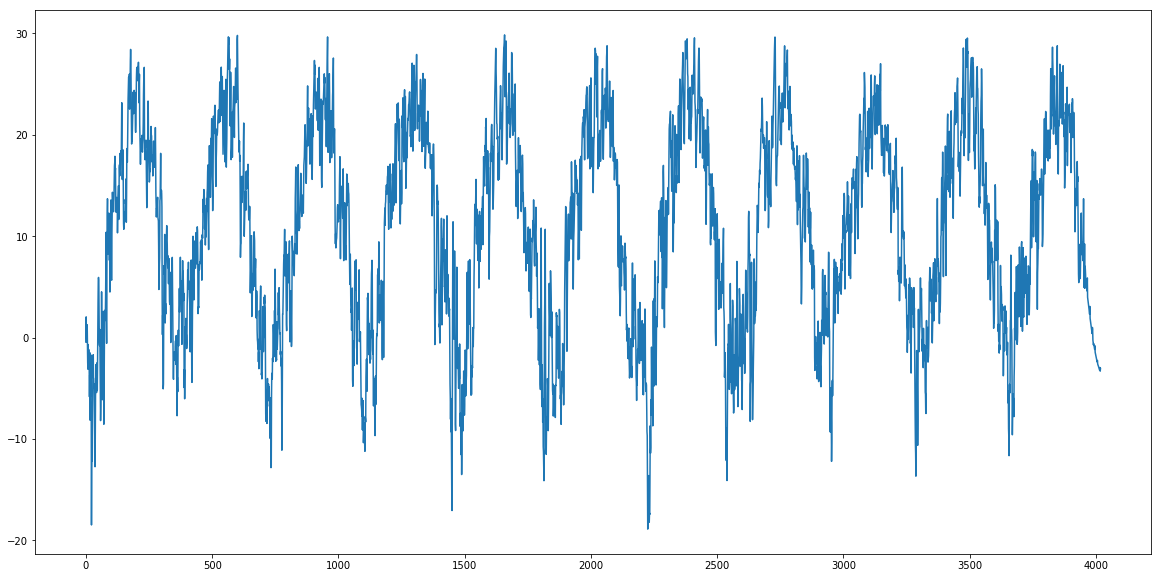

In [7]:
plt.plot(df_f.iloc[:,4]);

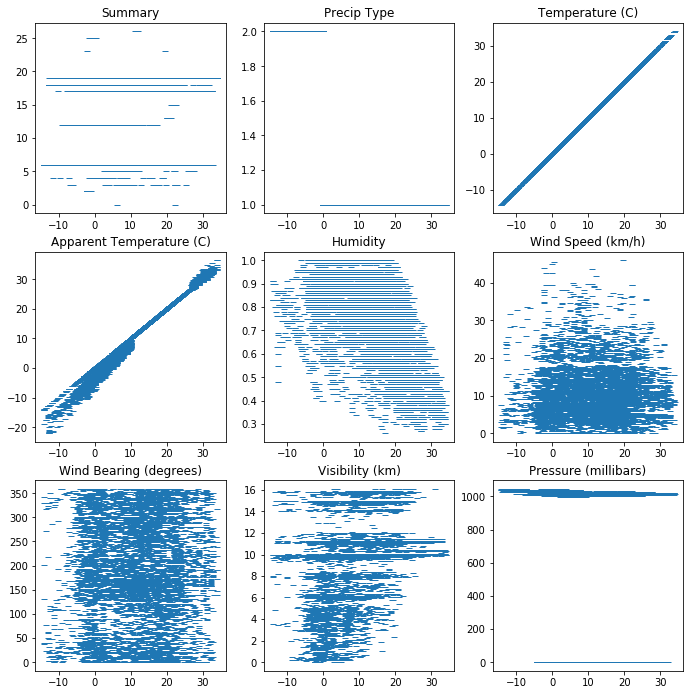

In [8]:
count = 0
fig, ax1 = plt.subplots(3, 3)
def set_size(w,h, ax1=None):
    """ w, h: width, height in inches """
    if not ax1: ax1=plt.gca()
    l = ax1.figure.subplotpars.left
    r = ax1.figure.subplotpars.right
    t = ax1.figure.subplotpars.top
    b = ax1.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax1.figure.set_size_inches(figw, figh)
set_size(9,9)
for i in range(3):
      for j in range(3):
            count += 1
            ax1[i,j].plot(df.iloc[:365*24,3],df.iloc[:365*24,count],'_') 
            ax1[i, j].set_title(df.iloc[:10,count].name)

In [9]:
df_f.corr()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,1.000000,0.105202,-0.077998,0.020796,0.020384,0.057752,-0.007473,-0.041715,0.140102,0.026393,-0.023886
Summary,0.105202,1.000000,-0.164962,0.132237,0.135790,0.058861,0.006003,0.080367,0.261846,0.167581,0.292518
Precip Type,-0.077998,-0.164962,1.000000,-0.639699,-0.642911,0.288626,-0.051226,-0.072671,-0.406628,0.016878,-0.282085
Temperature (C),0.020796,0.132237,-0.639699,1.000000,0.995784,-0.592154,-0.140464,0.050154,0.579331,-0.001887,0.486452
Apparent Temperature (C),0.020384,0.135790,-0.642911,0.995784,1.000000,-0.575351,-0.191236,0.048827,0.558980,0.005833,0.476643
Humidity,0.057752,0.058861,0.288626,-0.592154,-0.575351,1.000000,-0.060207,-0.014522,-0.696063,-0.006868,-0.540579
Wind Speed (km/h),-0.007473,0.006003,-0.051226,-0.140464,-0.191236,-0.060207,1.000000,0.159195,0.197446,-0.088824,-0.008490
Wind Bearing (degrees),-0.041715,0.080367,-0.072671,0.050154,0.048827,-0.014522,0.159195,1.000000,0.100735,-0.044796,0.086415
Visibility (km),0.140102,0.261846,-0.406628,0.579331,0.558980,-0.696063,0.197446,0.100735,1.000000,0.055046,0.600158
Pressure (millibars),0.026393,0.167581,0.016878,-0.001887,0.005833,-0.006868,-0.088824,-0.044796,0.055046,1.000000,0.090099


In [10]:
feature = 3
train = df_f.iloc[:9*D*(24//H),[feature]]
test = df_f.iloc[9*D*(24//H):,[feature]]
df_f.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
4014,16122700,17.00,1.50,0.27,-3.17,0.89,10.98,185.83,7.30,1020.31,111.0
4015,16122800,17.00,1.54,0.22,-3.23,0.89,10.97,185.79,7.31,1020.34,111.0
4016,16122900,17.25,1.42,0.44,-2.96,0.89,10.93,182.83,7.37,1020.26,111.0
4017,16123000,17.00,1.54,0.11,-3.31,0.89,10.81,185.83,7.32,1020.40,111.0
4018,16123100,17.25,1.42,0.34,-3.06,0.89,10.83,183.54,7.38,1020.31,111.0


# model Function 

In [11]:
def modelLoop(train,test,look_back,single=False,save=False):
    
    trainx,trainy = create_dataset(np.array(train),look_back=look_back)
    #trainy = trainy.reshape(-1,1)[::trainx.shape[2]]
    trainx = np.reshape(trainx, (trainx.shape[0], 1, look_back*trainx.shape[2]))
    
    testx,testy = create_dataset(np.array(test),look_back=look_back)
    #testy =testy.reshape(-1,1)[::testx.shape[2]]
    testx = np.reshape(testx, (testx.shape[0], 1, look_back*testx.shape[2]))
    
    model = Sequential()
    model.add(LSTM(150,return_sequences = True, input_shape = (trainx.shape[1], trainx.shape[2])))
    model.add(LSTM(510,return_sequences = True, input_shape = (trainx.shape[1], trainx.shape[2])))
    model.add(LSTM(512,input_shape = (trainx.shape[1], trainx.shape[2])))
    model.add(Dense(testy.shape[1]))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    if single == True:
        
        if save == True:
            model.fit(trainx.round(2), trainy.round(2), epochs = 50, batch_size = 365, verbose = 2, shuffle = False)
            model.save_weights('LSTMlook_back{}{}.h5'.format(['h' if feature==5 else ''][0],look_back))
        else:
            model.load_weights('LSTMlook_back{}{}.h5'.format(['h' if feature==5 else ''][0],look_back))
        predict = model.predict(testx[:]).reshape(1,-1)
        '''
        predict=model.predict(testx[:look_back]).reshape(1,-1)
        
        predict =np.reshape(predict, (predict.shape[0], 1, predict.shape[1]))
        #print(predict)
        for i in range(1,look_back):
         
            
            tmp = model.predict(testx[i:i+look_back]).reshape(1,-1)
            
            tmp =np.reshape(tmp, (tmp.shape[0], 1, tmp.shape[1]))
            predict = np.append(predict,tmp,axis=0)
            
        for i in range(100):
            
            tmp = model.predict(predict[-1:-look_back-1:-1]).reshape(1,-1)
            tmp =np.reshape(tmp, (tmp.shape[0], 1, tmp.shape[1]))
            predict = np.append(predict,tmp,axis=0)
           '''  
        return predict, testy, testx
    elif look_back > 0:
        model.load_weights('LSTMlook_back{}{}.h5'.format(['h' if feature==5 else ''][0],look_back))
    
        pred_1 = model.predict(trainx[:]).round(2)
        predtest_1 = model.predict(testx[:]).round(2)
    
        return pd.Series(pred_1.reshape(1,-1)[0]), pd.Series(predtest_1.reshape(1,-1)[0])
    else:
        
        return pd.Series(trainy.reshape(1,-1)[0]),pd.Series(testy.reshape(1,-1)[0])

In [12]:
def Plot(testy, predict,single=False):
    if single:
        i=1
    else:
        i=0
    avg = (sum(abs(testy[:testy.shape[0]-i]-predict[i:])))/predict[i:].shape[0]
    sd = sum(abs(abs(testy[:testy.shape[0]-i]-predict[i:])-avg))/predict[i:].shape[0]
    print('MAE =',avg,'±',sd,'\nMAX Error:',max(abs(testy[:testy.shape[0]-i]-predict[i:])))
    plt.plot(testy[:],'b-',label='Real Value')
    plt.plot(predict[i:],'g-',label="Predicted Value")
    plt.plot(testy[:testy.shape[0]-i]-predict[i:],'r-',label="difference")
    plt.legend();
    plt.show();
    

# Bulding Model Single Look_back LSTM Model on Training Data

In [18]:
look_back=1

predict, testy, testx = modelLoop(train,test,look_back,single = True,save=True)


Epoch 1/50
 - 3s - loss: 204.5448
Epoch 2/50
 - 2s - loss: 85.7592
Epoch 3/50
 - 2s - loss: 25.6669
Epoch 4/50
 - 2s - loss: 18.6219
Epoch 5/50
 - 2s - loss: 16.0162
Epoch 6/50
 - 2s - loss: 11.3594
Epoch 7/50
 - 2s - loss: 9.4344
Epoch 8/50
 - 2s - loss: 8.0168
Epoch 9/50
 - 2s - loss: 7.1798
Epoch 10/50
 - 2s - loss: 6.8403
Epoch 11/50
 - 2s - loss: 6.6810
Epoch 12/50
 - 2s - loss: 6.5422
Epoch 13/50
 - 2s - loss: 6.4221
Epoch 14/50
 - 2s - loss: 6.2882
Epoch 15/50
 - 2s - loss: 6.1620
Epoch 16/50
 - 2s - loss: 6.0293
Epoch 17/50
 - 2s - loss: 5.8946
Epoch 18/50
 - 2s - loss: 5.7499
Epoch 19/50
 - 2s - loss: 5.5965
Epoch 20/50
 - 2s - loss: 5.4342
Epoch 21/50
 - 2s - loss: 5.2686
Epoch 22/50
 - 2s - loss: 5.1111
Epoch 23/50
 - 2s - loss: 4.9764
Epoch 24/50
 - 2s - loss: 4.8774
Epoch 25/50
 - 2s - loss: 4.8158
Epoch 26/50
 - 2s - loss: 4.7820
Epoch 27/50
 - 2s - loss: 4.7626
Epoch 28/50
 - 2s - loss: 4.7495
Epoch 29/50
 - 2s - loss: 4.7395
Epoch 30/50
 - 2s - loss: 4.7319
Epoch 31/50


In [19]:
train.shape,test.shape

((3285, 1), (734, 1))

# Testing Single look_back Model

MAE = [0.2257714] ± [0.20664583] 
MAX Error: [2.4231134]


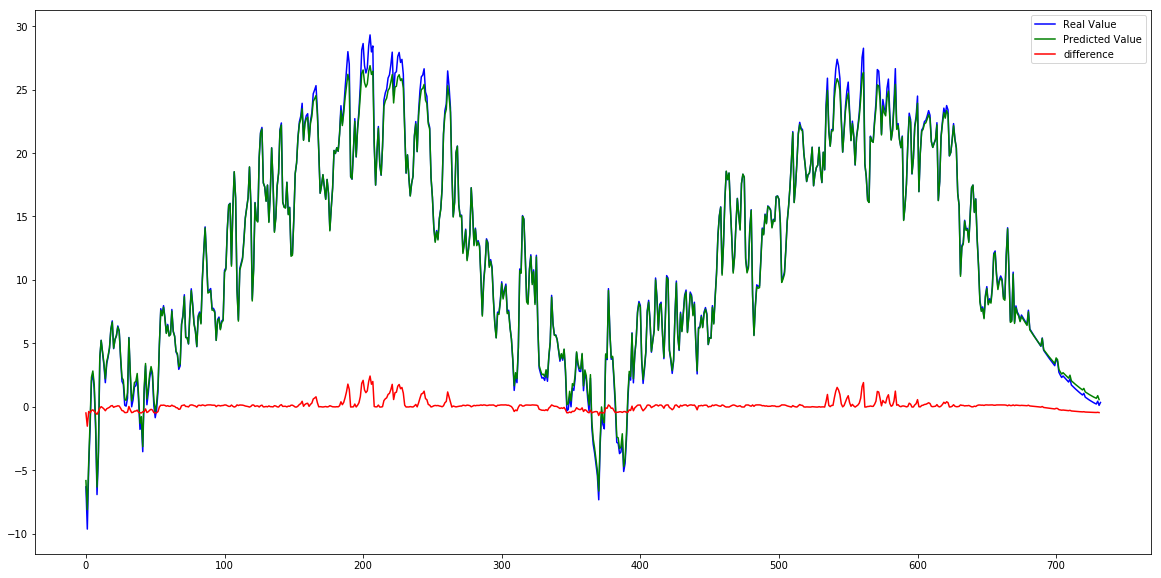

In [20]:
Plot(testy[:], predict.reshape(-1,1),single=True)

# Bulding Model mult-look_back LSTM Model on Training Data

In [22]:
ls,ls_test,start,end=[],[],1,3
names=[]

for i in range(start,end+1):
    names.append('look_back{}'.format(i))
    
    ls.append(modelLoop(train,test,i)[0][end-i:].reset_index().iloc[:,1])
    ls_test.append(modelLoop(train,test,i)[1][end-i:].reset_index().iloc[:,1])
    
ls.append(modelLoop(train,test,0)[0][end-1:].reset_index().iloc[:,1])
ls_test.append(modelLoop(train,test,0)[1][end-1:].reset_index().iloc[:,1])

names.append('Real')   

dff = pd.concat(ls, axis=1).dropna()
dff.columns = names

dft = pd.concat(ls_test, axis=1).dropna()
dft.columns = names


In [23]:
dff.to_csv('../datasets/lookback{}{}to{}.csv'.format(['h' if feature==5 else ''][0],start,end), index=False)

# Testing 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

dfF = pd.read_csv('../datasets/lookback{}{}to{}.csv'.format(['h' if feature==5 else ''][0],start,end)).dropna()
X=dfF.iloc[:,:-1]
y=dfF.iloc[:,-1]
Xtest = dft.iloc[:,:-1].dropna()
ytest = dft.iloc[:,-1].dropna()

In [25]:

ln=LinearRegression()
ln.fit(X,y)
svr=SVR()
svr.fit(X,y)
rf=RandomForestRegressor()
rf.fit(X,y);


C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE = 0.20729643765219813 ± 0.11671549825853252 
MAX Error: 1.818587608021378


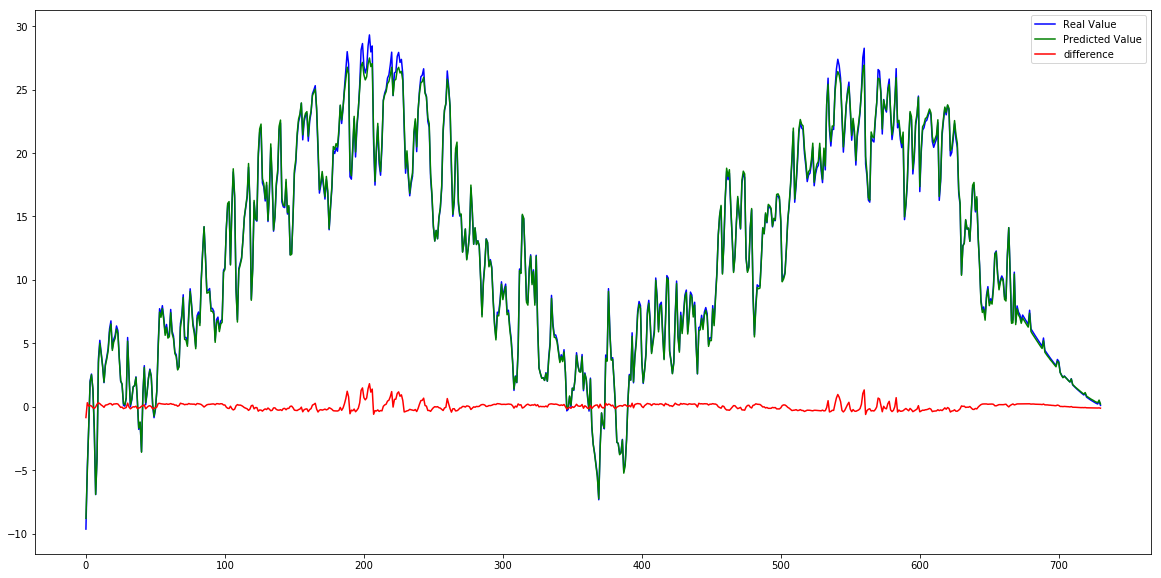

In [26]:

predf = ln.predict(Xtest)

Plot(ytest,predf)


MAE = 0.14461653068468278 ± 0.13592636939593125 
MAX Error: 5.4595172487005605


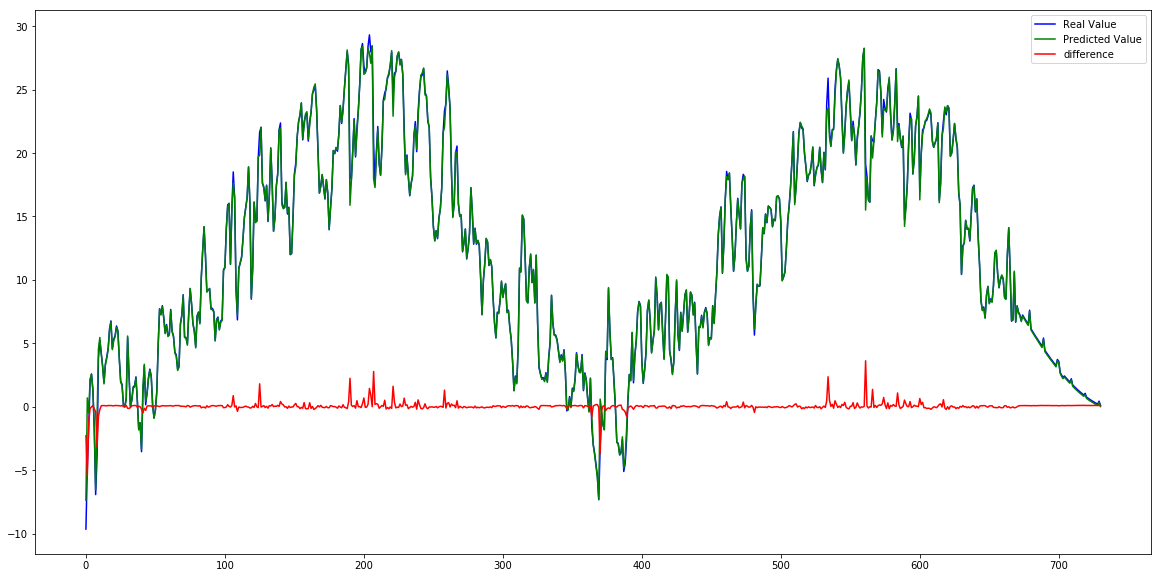

In [27]:

predf = svr.predict(Xtest)

Plot(ytest,predf)


MAE = 0.00901641586867315 ± 0.00681822213821735 
MAX Error: 0.1869999999999976


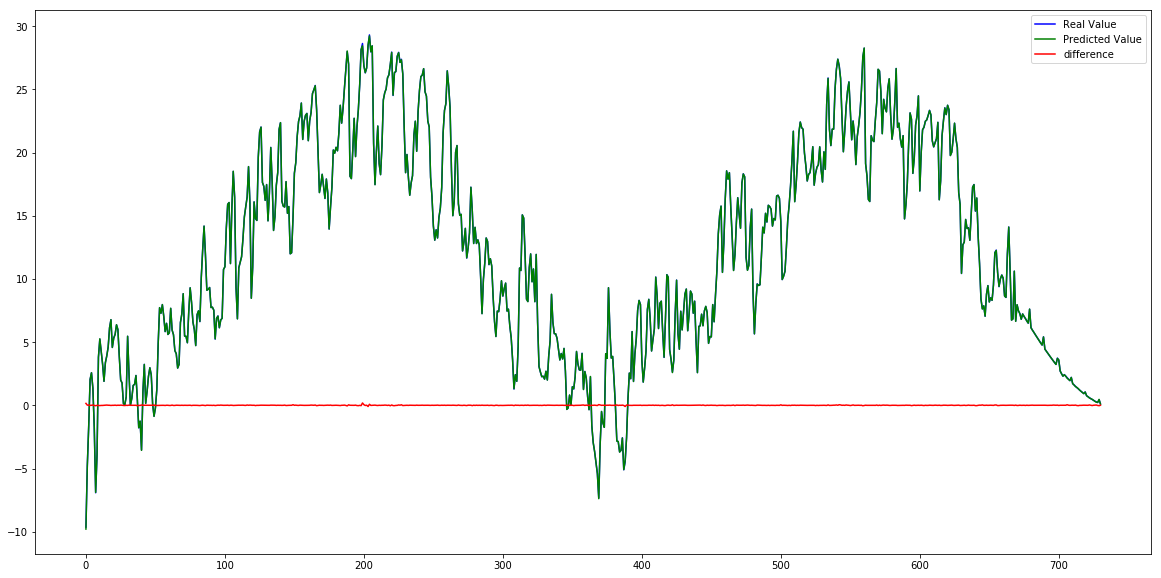

In [28]:

predf = rf.predict(Xtest)

Plot(ytest,predf)


MAE = 0.044294128247984066 ± 0.02762214337480596 
MAX Error: 0.3123213323371603


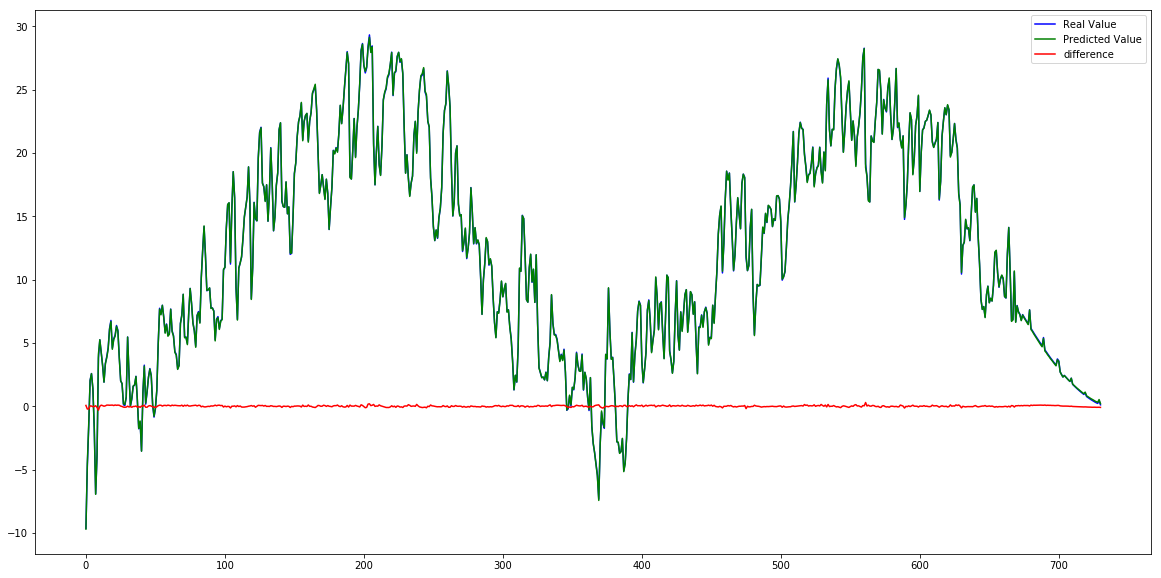

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

modelpol = Pipeline([('poly', PolynomialFeatures(degree=6)),('linear', LinearRegression(fit_intercept=False))])
modelpol.fit(X,y)
predf = modelpol.predict(Xtest)
Plot(ytest,predf)